## Load the dataset

### Subtask:
Load the `train.csv` dataset into a pandas DataFrame.


**Reasoning**:
Import pandas and load the train.csv file into a DataFrame.



In [6]:
import pandas as pd

df_train = pd.read_csv('/content/train.csv')

## Explore the data (eda)

### Subtask:
Perform exploratory data analysis to understand the data, including displaying the first few rows, showing summary statistics, and checking for missing values.


**Reasoning**:
Perform exploratory data analysis by displaying the head, summary statistics, and checking for missing values.



In [7]:
display(df_train.head())
display(df_train.describe())
display(df_train.isnull().sum())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Data preprocessing

### Subtask:
Handle missing values, encode categorical variables, and drop unnecessary columns.


**Reasoning**:
Handle missing values, encode categorical variables, and drop unnecessary columns as per the instructions.



In [8]:
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
df_train.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'], drop_first=True)
display(df_train.head())
display(df_train.isnull().sum())

/tmp/ipython-input-8-1874043652.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
/tmp/ipython-input-8-1874043652.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Sex_male,0
Embarked_Q,0
Embarked_S,0


## Feature selection and splitting

### Subtask:
Select relevant features, define X (features) and y (target), and split the data into training and testing sets.


**Reasoning**:
Define the target variable and feature set, then split the data into training and testing sets.



In [9]:
y = df_train['Survived']
X = df_train.drop('Survived', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model building

### Subtask:
Import and train a Decision Tree Classifier on the training data.


**Reasoning**:
Import the DecisionTreeClassifier and train the model.



In [10]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Evaluation

### Subtask:
Predict on the test set and evaluate the model using accuracy, confusion matrix, and classification report.


**Reasoning**:
Make predictions on the test set and evaluate the model using accuracy, confusion matrix, and classification report.



In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.7821229050279329

Confusion Matrix:
[[84 21]
 [18 56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



## Visualization

### Subtask:
Visualize the decision tree.


**Reasoning**:
Visualize the decision tree using plot_tree and display it.



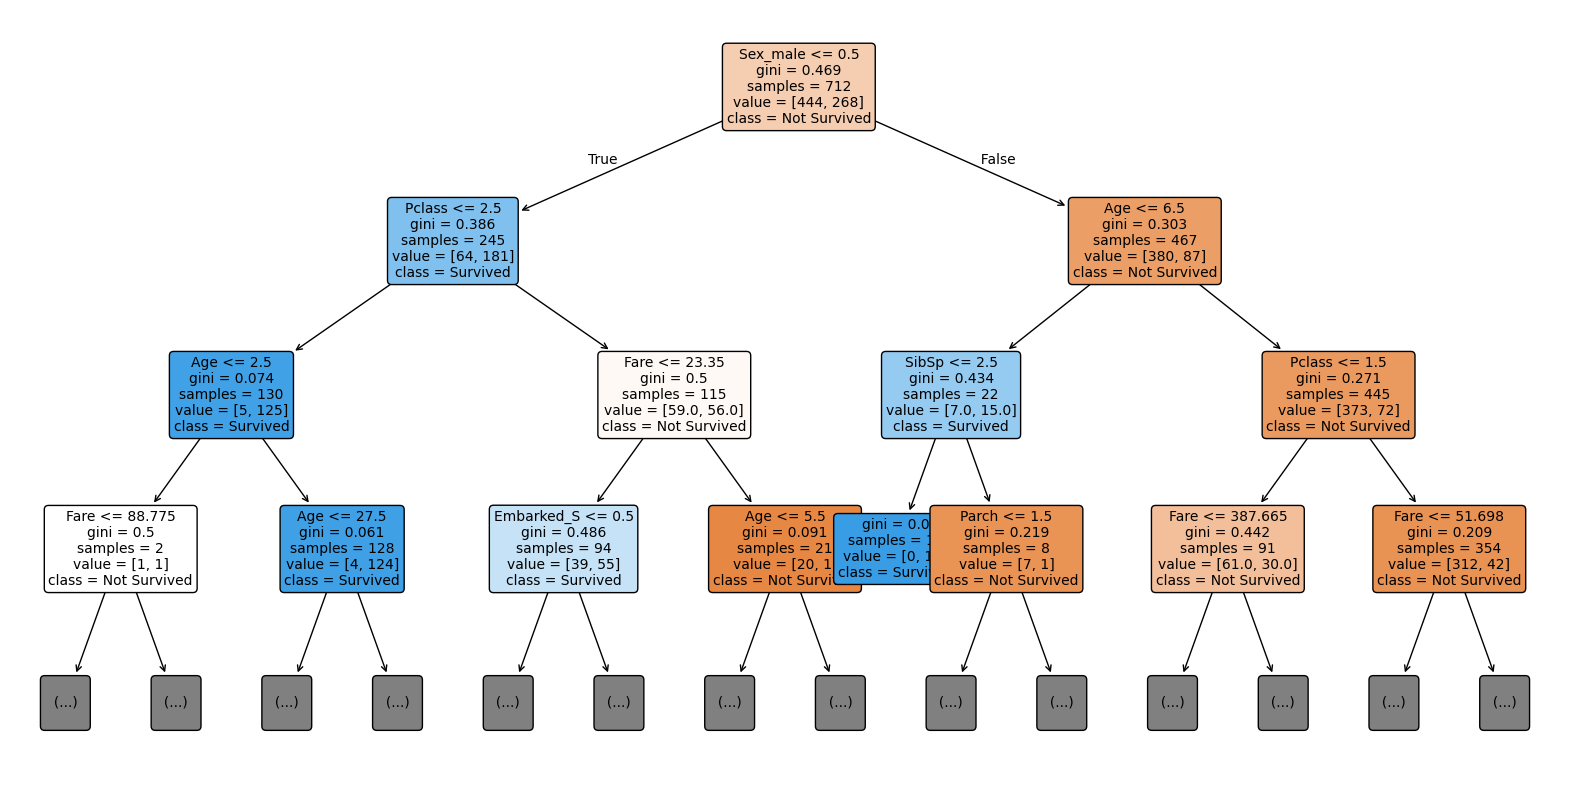

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True, max_depth=3, fontsize=10)
plt.show()

## Print accuracy

### Subtask:
Print the final model accuracy and feature importances.


**Reasoning**:
Print the calculated accuracy and display the feature importances.



In [13]:
print(f"Final Model Accuracy: {accuracy}")

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
sorted_feature_importances = feature_importances.sort_values(ascending=False)

print("\nFeature Importances:")
display(sorted_feature_importances)

Final Model Accuracy: 0.7821229050279329

Feature Importances:


,0
Sex_male,0.310280
Fare,0.256296
Age,0.202842
Pclass,0.115341
SibSp,0.062626
Parch,0.027890
Embarked_S,0.020056
Embarked_Q,0.004669


## Summary:

### Data Analysis Key Findings

*   The Decision Tree Classifier model achieved an accuracy of approximately 78.21% on the test set of the Titanic dataset.
*   The most important features for the model's prediction were 'Sex_male', 'Fare', and 'Age'.
*   The confusion matrix indicates that the model correctly predicted 84 non-survivors and 56 survivors in the test set.

### Insights or Next Steps

*   The model's performance is reasonable for this dataset, but there is room for improvement, particularly in reducing false positives and false negatives.
*   Further tuning of Decision Tree hyperparameters (e.g., `max_depth`, `min_samples_split`, `min_samples_leaf`) could potentially improve accuracy and generalization.
